In [1]:
from matplotlib import pyplot as plt
import matplotlib
from sklearn import preprocessing
import os
import numpy as np
import random as rd
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()
sess  = tf.compat.v1.InteractiveSession()
from scipy.integrate import odeint
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
import scipy
import joblib

In [2]:
def discrete_toggle_switch(x):
    V1, V2, b1, b2, n, delta = np.array([5, 5, 1, 2, 2, 0.18])
    dt = 0.2
    x_f1 = (1 - delta*dt)*x[0] + V1*dt/(1 + b1*x[1]**n)
    x_f2 = (1 - delta*dt)*x[1] + V2*dt/(1 + b2*x[0]**n)
    return [x_f1, x_f2]


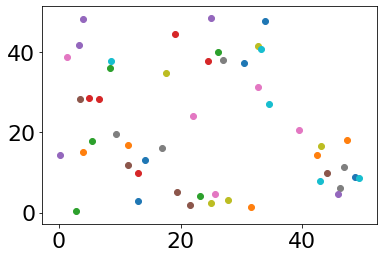

In [5]:
ICs = []
num_ics = 50
for i in range(0, num_ics):
    r = rd.uniform(30, 40)
    theta = rd.uniform(0, 0.5*3.14)
    ICs.append([np.random.uniform(0, 50), np.random.uniform(0, 50)])
    
for i in range(0, num_ics):
    plt.scatter(ICs[i][0],ICs[i][1])

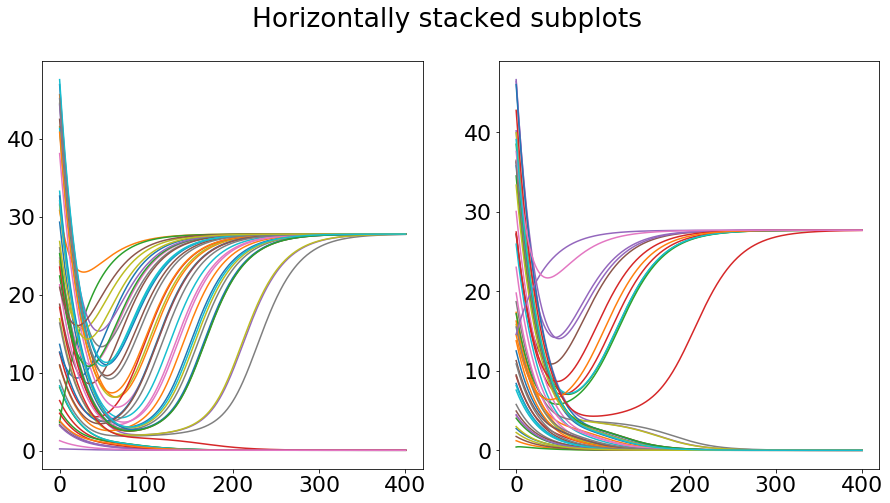

In [7]:
T = 400
matplotlib.rcParams.update({'font.size': 22})

t = np.linspace(0, T, T+1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
fig.suptitle('Horizontally stacked subplots')
count = 0
for ic in ICs:
    x = np.array([ic[0], ic[1]])
    sol = []
    for i in range(0, T+1):
        y = discrete_toggle_switch(x)
        x = y
        sol.append(x)
    if not count:
        Xp_data = np.array(sol[0:-1]).T
        Xf_data = np.array(sol[1:]).T
    else:
        #print("exec")
        Xp_data = np.hstack([Xp_data, np.array(sol[0:-1]).T])
        Xf_data = np.hstack([Xf_data, np.array(sol[1:]).T])        
    ax1.plot(t, np.array(sol).T[0])
    ax2.plot(t, np.array(sol).T[1])
    count+=1

In [18]:
Xp=tf.compat.v1.placeholder(tf.compat.v1.double, shape = (2, Xp_data.shape[1]))

Xf=tf.compat.v1.placeholder(tf.compat.v1.double, shape = (2, Xf_data.shape[1]))

#n = tf.compat.v1.Variable(np.random.randn(), name = 'n', dtype = tf.double)
#n1 = tf.compat.v1.get_variable('n1',
#                   dtype=tf.double,
#                   shape=(),
#                   initializer=tf.random_uniform_initializer(minval=1., maxval=10.),
#                   constraint=lambda z: tf.clip_by_value(z, 1, 10))

V1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=5,stddev=0.3,dtype=tf.double))
V2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=5,stddev=0.3,dtype=tf.double))
b1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
b2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
a1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
a2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))

c1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
c2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
d1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
d2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))

n1 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))
n2 = tf.Variable(tf.compat.v1.truncated_normal((1, ), mean=3,stddev=0.3,dtype=tf.double))

#n1 = tf.Variable(1.0, dtype = tf.double)

Kx = tf.Variable(tf.compat.v1.truncated_normal((4, 4), mean=0.0,stddev=0.1,dtype=tf.double));
#np.abs(Y - W*b)


#last_col = tf.constant(np.zeros(shape=(3, 1)), dtype=tf.dtypes.double)

#last_col = tf.concat([last_col, [[1.]]], axis=0)

#Kx = tf.concat([Kx, last_col], axis=1)  
#print(Kx)




R2 = (1 - tf.divide(tf.math.reduce_sum(tf.math.square(tf.concat([Xf, [Xf[0]**n1]], axis = 0) - tf.math.reduce_mean(tf.concat([Xf, [Xf[0]**n1]], axis = 0), axis=0))), tf.math.reduce_sum(tf.math.square(tf.concat([Xf, [Xf[0]**n1]], axis = 0) - tf.matmul(Kx, tf.concat([Xf, [Xf[0]**n1]], axis = 0)))))) * 100

In [19]:
sess = tf.compat.v1.InteractiveSession();
sess.run(tf.compat.v1.global_variables_initializer());



In [34]:
def generalized_hill_function(X):
    return tf.concat([[V1*((1 + a1*X[0]**n1 + a2*X[1]**n2))/(1 + b1*X[0]**n1 + b2*X[1]**n2)], [V2*((1 + c1*X[0]**n1 + c2*X[1]**n2))/(1 + d1*X[0]**n1 + d2*X[1]**n2)]], axis = 0)

In [35]:
def generalized_hill_function_numpy(X):
    return np.vstack([[V1*((1 + a1*X[0]**coop1 + a2*X[1]**coop2))/(1 + b1*X[0]**coop1 + b2*X[1]**coop2)], [V2*((1 + c1*X[0]**coop1 + c2*X[1]**coop2))/(1 + d1*X[0]**coop1 + d2*X[1]**coop2)]])

In [22]:
cost = tf.reduce_sum(tf.pow(tf.concat([Xf, generalized_hill_function(Xf)], axis = 0) - tf.matmul(Kx, tf.concat([Xp, generalized_hill_function(Xp)], axis = 0)), 2))/Xp_data.shape[1]


In [55]:
training_epochs = 20000
learning_rate = 0.00050
error_threshold = 0.0000001
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-08, use_locking=False, name='Adam').minimize(cost)
init = tf.compat.v1.global_variables_initializer()
c = 100
epoch = 0
with tf.compat.v1.Session() as sesh:    
    sesh.run(init)    
    #print("Initial n1", sesh.run(n1))
    while epoch < training_epochs and c > error_threshold:
        c = sesh.run(cost, feed_dict = {Xp: np.array(Xp_data), Xf: np.array(Xf_data)})
        if epoch % 500 == 0:
            print("Epoch:", epoch, "{:.5f}".format(c))
            #print("Exponent", sesh.run(n1))
            #print("R2", sesh.run(R2, feed_dict = {Xp: np.array(Xp_data), Xf: np.array(Xf_data)}))
        sesh.run(optimizer, feed_dict = {Xp: np.array(Xp_data), Xf: np.array(Xf_data)})
        epoch+=1
        n1 = tf.clip_by_value(n1, 0, np.inf)
        n2 = tf.clip_by_value(n2, 0, np.inf)
        V1 = tf.clip_by_value(V1, 0, np.inf)
        V2 = tf.clip_by_value(V2, 0, np.inf)
        a1 = tf.clip_by_value(a1, 0, np.inf)
        a2 = tf.clip_by_value(a2, 0, np.inf)
        b1 = tf.clip_by_value(b1, 0, np.inf)
        b2 = tf.clip_by_value(b2, 0, np.inf)
        c1 = tf.clip_by_value(c1, 0, np.inf)
        c2 = tf.clip_by_value(c2, 0, np.inf)
        d1 = tf.clip_by_value(d1, 0, np.inf)
        d2 = tf.clip_by_value(d2, 0, np.inf)
    KxT_num = sesh.run(Kx)
    #sesh.close()
    print("coop1", sesh.run(n1))
    coop1 = sesh.run(n1)
    print("coop2", sesh.run(n2))
    coop2 = sesh.run(n2)
    print("V1", sesh.run(V1))
    V1 = sesh.run(V1)    
    print("V2", sesh.run(V2))
    V2 = sesh.run(V2)
    print("b1", sesh.run(b1))
    b1 = sesh.run(b1)
    print("b2", sesh.run(b2))
    b2 = sesh.run(b2)
    print("a1", sesh.run(a1))
    a1 = sesh.run(a1)
    print("a2", sesh.run(a2))
    a2 = sesh.run(a2)
    print("c1", sesh.run(c1))
    c1 = sesh.run(c1)
    print("c2", sesh.run(c2))
    c2 = sesh.run(c2)
    print("d1", sesh.run(d1))
    d1 = sesh.run(d1)
    print("d2", sesh.run(d2))
    d2 = sesh.run(d2)
    #print("Exponent", sesh.run(n))
    print(sesh.run(cost, feed_dict = {Xp: np.array(Xp_data), Xf: np.array(Xf_data)}))

Epoch: 0 715.94164
Epoch: 500 299.65740
Epoch: 1000 71.87243
Epoch: 1500 21.09146
Epoch: 2000 6.25487
Epoch: 2500 0.76984
Epoch: 3000 0.05897
Epoch: 3500 0.05151
Epoch: 4000 0.04785
Epoch: 4500 0.04013


KeyboardInterrupt: 

In [57]:
n1

<tf.Tensor 'clip_by_value_87612:0' shape=(1,) dtype=float64>

In [50]:
KxT_num

array([[ 0.06054188,  0.05183806,  0.18124607,  0.03140333],
       [-0.06106772, -0.07500422,  0.00202029, -0.03531957],
       [-0.02403304,  0.0758468 , -0.15027286,  0.03062427],
       [ 0.15132328, -0.07320526,  0.05984499,  0.03484196]])

(4.0, 0.0)

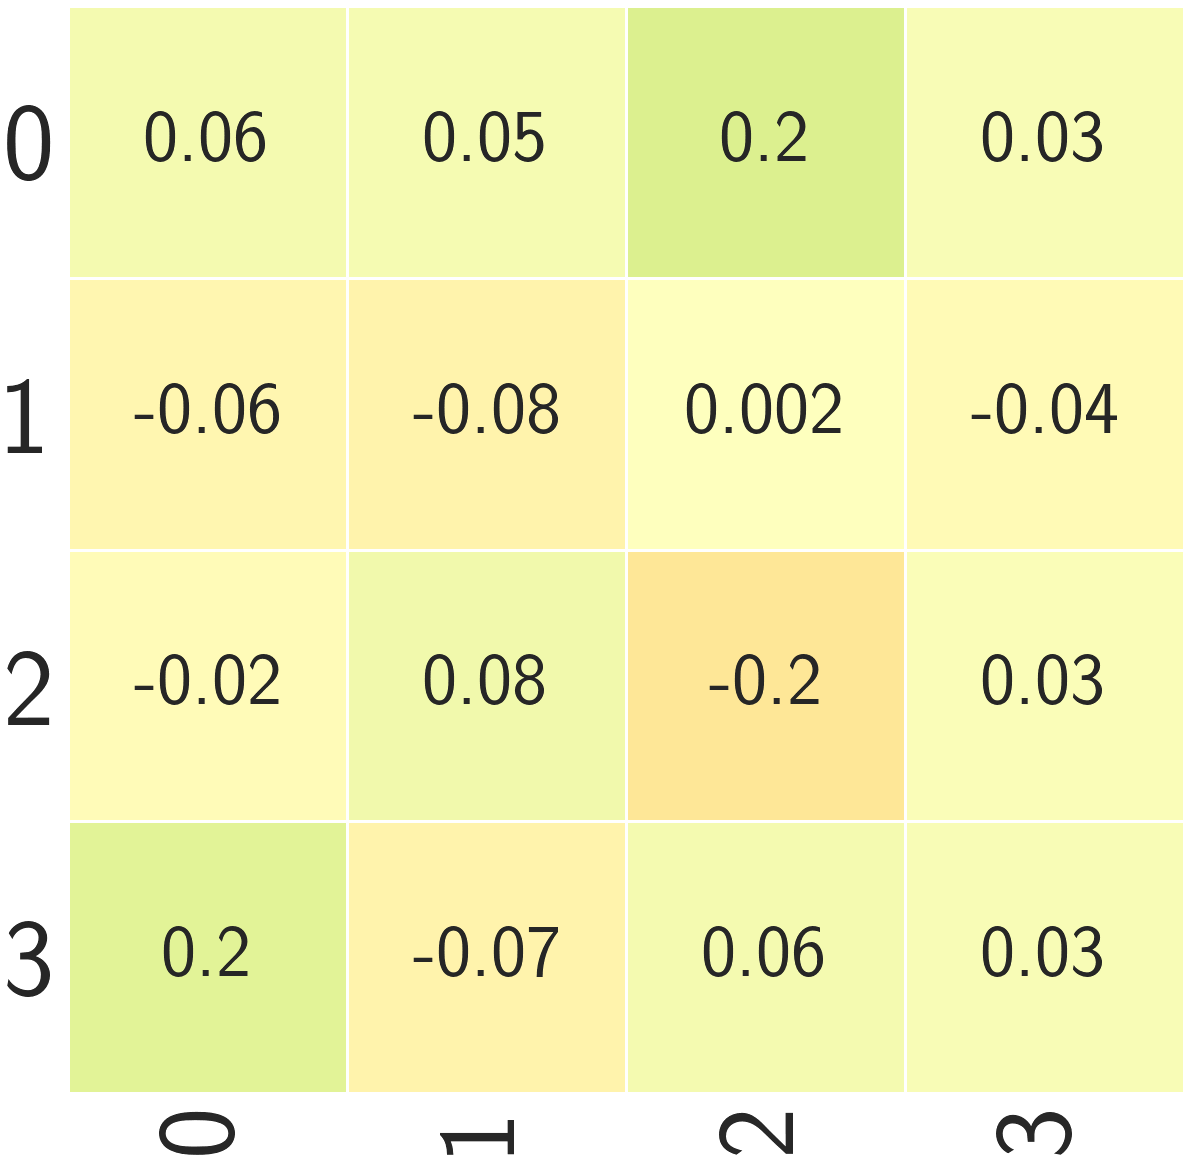

In [51]:


import matplotlib
import seaborn as sns;
matplotlib.rcParams.update({'font.size': 10})
plt.figure(figsize=(20.0,20.0))
ax = sns.heatmap((KxT_num), linewidths=2.0,cmap='RdYlGn',vmin=-1,vmax=1,annot=True,fmt='.1g',cbar=False, annot_kws = {"Size": 75})
bottom, top = ax.get_ylim()
#ax.set_xticklabels(FullInputDictionary_Symbolic,fontsize=25)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.rc('text', usetex=True);
plt.rc('font', family='serif',size=40);
sns.set(font_scale=10) 
bottom, top = ax.get_ylim()
# plt.axis('equal')

ax.set_ylim(bottom + 0.5, top - 0.5)



In [52]:
np.linalg.eig(KxT_num)

(array([ 0.10696072+0.j        , -0.0350051 +0.05018567j,
        -0.0350051 -0.05018567j, -0.16684375+0.j        ]),
 array([[ 0.30084062+0.j        , -0.47688723+0.25242709j,
         -0.47688723-0.25242709j,  0.5351802 +0.j        ],
        [-0.27804589+0.j        , -0.17219363-0.18012962j,
         -0.17219363+0.18012962j,  0.35515167+0.j        ],
        [-0.00148621+0.j        ,  0.09748267-0.21359901j,
          0.09748267+0.21359901j, -0.76509413+0.j        ],
        [ 0.91224075+0.j        ,  0.76917774+0.j        ,
          0.76917774-0.j        , -0.04561156+0.j        ]]))

In [53]:
KxT_num

array([[ 0.06054188,  0.05183806,  0.18124607,  0.03140333],
       [-0.06106772, -0.07500422,  0.00202029, -0.03531957],
       [-0.02403304,  0.0758468 , -0.15027286,  0.03062427],
       [ 0.15132328, -0.07320526,  0.05984499,  0.03484196]])

NotImplementedError: Cannot convert a symbolic Tensor (truediv_5:0) to a numpy array.

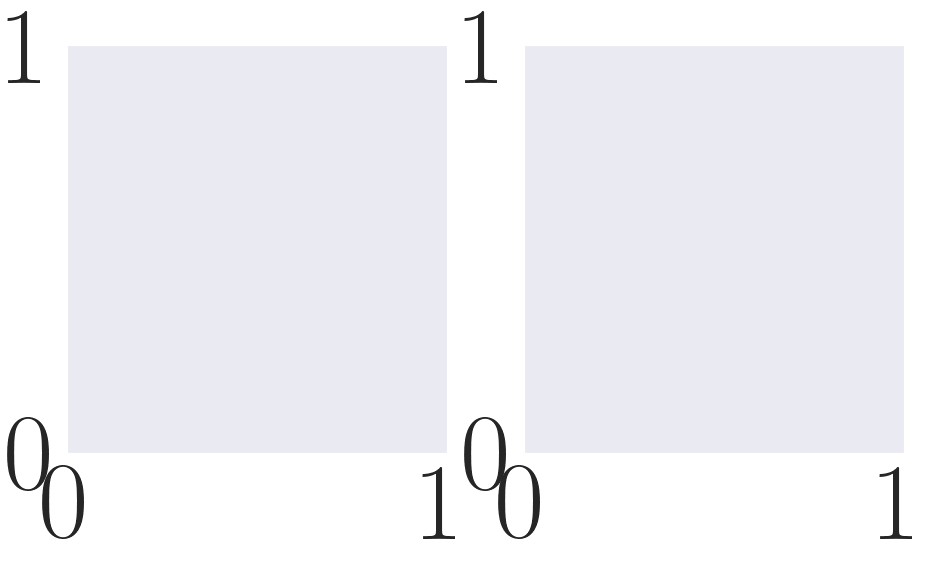

In [54]:
Xp_final_learned = []
Xf_final_learned = []
Xp_final_actual = []
Xf_final_actual = []
#t = np.array([i for i in range(0, N+1)])
matplotlib.rcParams.update({'font.size': 22})

x_learned = np.zeros(2)
x_actual = np.zeros(2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
#fig.suptitle('Horizontally stacked subplots')
for ic in ICs:
    #ic_s = scaler.transform(np.array([ic]))
    x_learned = np.array(ic)
    x_actual[0] = ic[0]
    x_actual[1] = ic[1]
    X_learned = []
    #print("x_actual", x_actual)
    #print("x_learned", x_learned)
    X_actual = []
    X_learned.append([x_learned[0], x_learned[1]]) ## ICs
    X_actual.append(np.array([x_actual[0], x_actual[1]])) 
    for k in range(0, T):
        obs = generalized_hill_function_numpy(x_learned).T[0]
        y_learned =  np.matmul(KxT_num, np.vstack([x_learned[0], x_learned[1], obs[0], obs[1]]))[0:2]
        x_learned = y_learned#np.array([[y_learned[0], y_learned[1]]])
        X_learned.append([x_learned[0], x_learned[1]]) 
        y_actual = discrete_toggle_switch(x_actual)
        x_actual = y_actual
        X_actual.append(x_actual)
        #if k % 10 == 0:
            #print(y_learned)
    #print('Plotting')
    ax1.scatter(t, np.array(X_actual).T[0], s = 1)
    ax1.plot(t, np.array(X_learned).T[0])
    ax2.scatter(t, np.array(X_actual).T[1], s = 1)
    ax2.plot(t, np.array(X_learned).T[1])